# NLP (HW1)
## Persian Gender Recognition
## Authors: Nahal Mirzaie, Tahere Talaie
### Spring 1400

## Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Clone Project from Github

In [2]:
%cd drive/MyDrive

!git clone 'https://github.com/mirzanahal/Persian-Gender-Recognition'

/content/drive/MyDrive
Cloning into 'Persian-Gender-Recognition'...
remote: Enumerating objects: 2103, done.
remote: Counting objects: 100% (2103/2103), done.
remote: Compressing objects: 100% (2048/2048), done.
remote: Total 2103 (delta 58), reused 2070 (delta 31), pack-reused 0
Receiving objects: 100% (2103/2103), 24.85 MiB | 10.31 MiB/s, done.
Resolving deltas: 100% (58/58), done.
Checking out files: 100% (2042/2042), done.


### Install Requirement

In [3]:
!pip install -r Persian-Gender-Recognition/requirement.txt

     |████████████████████████████████| 184kB 7.6MB/s 
     |████████████████████████████████| 317kB 14.2MB/s 
     |████████████████████████████████| 122kB 13.4MB/s 
     |████████████████████████████████| 788kB 13.4MB/s 
     |████████████████████████████████| 122kB 29.2MB/s 
     |████████████████████████████████| 235kB 24.1MB/s 
     |████████████████████████████████| 10.3MB 31.3MB/s 
     |████████████████████████████████| 1.4MB 27.3MB/s 
     |████████████████████████████████| 15.3MB 338kB/s 
     |████████████████████████████████| 9.9MB 50.3MB/s 
     |████████████████████████████████| 2.2MB 29.0MB/s 
     |████████████████████████████████| 368kB 52.8MB/s 
     |████████████████████████████████| 993kB 47.6MB/s 
     |████████████████████████████████| 512kB 39.8MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 22.3MB 1.9MB/s 
     |████████████████████████████████| 27.4MB 147kB/s 
     |████████████████████████████████| 430kB 51.9

### Set Directory

In [4]:
%cd Persian-Gender-Recognition/code

/content/drive/My Drive/Persian-Gender-Recognition/code


## Import 

In [5]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from os.path import isfile

import config
import utils
import data_path
import data_loader

from classifier import Classifier
from feature_generator import generate_features

## Load Datasets

In [10]:
embedding_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'embedded_texts_gensim.csv'), index_col=0)
print(embedding_features.head())

         F0        F1        F2        F3  ...       F48       F49  number  label
0  0.024206 -0.030991  0.063560 -0.027825  ... -0.011071  0.107874     289      0
1  0.015821 -0.058928 -0.138164 -0.130736  ... -0.124645  0.221547     504      0
2  0.033087  0.003720 -0.037134 -0.168871  ... -0.105814  0.138139     262      0
3 -0.023201 -0.061457  0.071226 -0.171489  ... -0.191763  0.125181     276      0
4 -0.009515  0.020851  0.036604 -0.234346  ... -0.198262  0.174200     510      0

[5 rows x 52 columns]


In [11]:
psychological_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'psychological_features.csv'), index_col=0)
print(psychological_features.head())

   PSY_F36  PSY_F37  PSY_F38  PSY_F39  PSY_F47  PSY_F48  number  label
0       25       16        0        0        0        0     289      0
1        2        5        0        1        0        2     504      0
2       19       16        0        0        0        0     262      0
3        7        9        0        0        0        0     276      0
4       33       44        0        4        0        0     510      0


In [12]:
structural_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'structural_features.csv'), index_col=0)
print(structural_features.head())

   STR_F25  STR_F26  STR_F27  STR_F28  STR_F29  number  label
0        1        1     55.0      0.0    122.5     289      0
1        0        1     18.0      0.0     92.0     504      0
2        1        1     53.0      0.0    117.5     262      0
3        0        1     20.0      0.0     80.0     276      0
4        1       10     14.3      0.0    276.5     510      0


In [14]:
syntactics_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'syntactics_features.csv'), index_col=0)
print(syntactics_features.head())

   SYN_F18   SYN_F19  SYN_F20  SYN_F21  ...   SYN_F23   SYN_F24  number  label
0      0.0  0.000000      0.0      0.0  ...  0.000000  0.000000     289      0
1      0.0  0.000000      0.0      0.0  ...  0.000000  0.000000     504      0
2      0.0  0.000000      0.0      0.0  ...  0.012766  0.004255     262      0
3      0.0  0.000000      0.0      0.0  ...  0.000000  0.000000     276      0
4      0.0  0.018083      0.0      0.0  ...  0.000000  0.000000     510      0

[5 rows x 9 columns]


In [15]:
text_dependent_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'text_dependent_features.csv'), index_col=0)
print(text_dependent_features.head())

   TD_F1     TD_F2  TD_F49  TD_F3     TD_F4  TD_F5     TD_F6  number  label
0    245  0.102041      25      1  0.179592    0.0  0.012245     289      0
1     92  0.217391      20      2  0.163043    0.0  0.000000     504      0
2    235  0.110638      26      3  0.195745    0.0  0.012766     262      0
3     80  0.250000      20      1  0.212500    0.0  0.000000     276      0
4    553  0.048825      27     16  0.249548    0.0  0.018083     510      0


In [16]:
word_dependent_features = pd.read_csv(os.path.join(data_path.DATA_PATH, 'word_dependent_features.csv'), index_col=0)
print(word_dependent_features.head())

   WD_F7     WD_F8     WD_F9    WD_F10  ...       WD_F17    WD_F50  number  label
0     55  4.454545  0.763636  0.600000  ...  1870.088820  3.635431     289      0
1     18  5.111111  0.888889  0.611111  ...  2312.297406  2.736339     504      0
2     53  4.433962  0.830189  0.660377  ...  2495.612060  3.715138     262      0
3     20  4.000000  0.950000  0.800000  ...  5691.891320  2.926418     276      0
4    143  3.867133  0.601399  0.608392  ...  2134.023191  4.147394     510      0

[5 rows x 14 columns]


## Generate Features

In [20]:
features_list = [embedding_features, psychological_features, structural_features, syntactics_features, text_dependent_features, word_dependent_features]

features = features_list.pop()
for feature in features_list:
  features = pd.merge(features, feature, left_on=['label', 'number'], right_on=['label', 'number'])

print(features.head())
print(features.shape)

   WD_F7     WD_F8     WD_F9    WD_F10  ...  TD_F3     TD_F4  TD_F5     TD_F6
0     55  4.454545  0.763636  0.600000  ...      1  0.179592    0.0  0.012245
1     18  5.111111  0.888889  0.611111  ...      2  0.163043    0.0  0.000000
2     53  4.433962  0.830189  0.660377  ...      3  0.195745    0.0  0.012766
3     20  4.000000  0.950000  0.800000  ...      1  0.212500    0.0  0.000000
4    143  3.867133  0.601399  0.608392  ...     16  0.249548    0.0  0.018083

[5 rows x 89 columns]
(2000, 89)


## Split X, y 

In [21]:
y = features['label']
X = features.drop(['label', 'number'], axis=1)

## Normalize

In [22]:

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Feature Importance

In [30]:
classifier = Classifier('Random Forest', n_estimator=200)
classifier.fit(X, y)
feature_importance = classifier.model.feature_importances_

In [33]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1MB 295kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.4.0
    Uninstalling matplotlib-3.4.0:
      Successfully uninstalled matplotlib-3.4.0


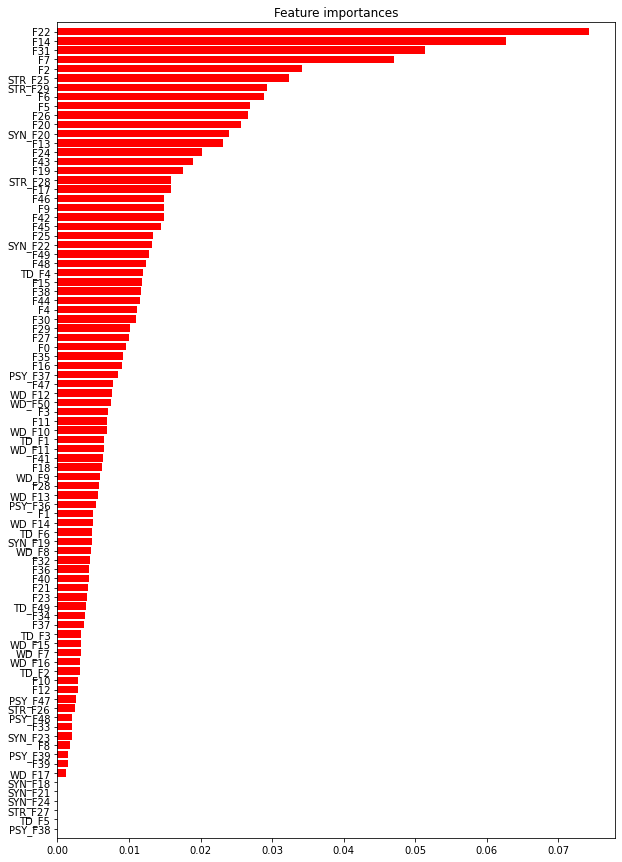

In [34]:
utils.plot_feature_importance(feature_importance, X)

In [65]:
selected_features = feature_importance > 0.01

In [69]:
X = X.T[selected_features].T
print(X.shape)

## Classification

In [80]:
classifier = Classifier('Random Forest', n_estimator=300, max_depth=10)
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.533981 | 0.673267 | 0.602041 | 0.470588 | 0.625    | 0.611111 | 0.537634 | 0.567797 | 0.582524 | 0.712644 | 0.591659 |
| recall    | 0.544554 | 0.686869 | 0.572816 | 0.564706 | 0.582524 | 0.594595 | 0.526316 | 0.712766 | 0.689655 | 0.553571 | 0.602837 |
| f1        | 0.539216 | 0.68     | 0.587065 | 0.513369 | 0.603015 | 0.60274  | 0.531915 | 0.632075 | 0.631579 | 0.623116 | 0.594409 |
| accuracy  | 0.53     | 0.68     | 0.585    | 0.545    | 0.605    | 0.565    | 0.56     | 0.61     | 0.65     | 0.625    | 0.5955   |


In [81]:
classifier = Classifier('SVM' , kernel='rbf', gamma='scale')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.57732  | 0.65625  | 0.610526 | 0.533981 | 0.655914 | 0.663366 | 0.565217 | 0.566038 | 0.56     | 0.674419 | 0.606303 |
| recall    | 0.554455 | 0.636364 | 0.563107 | 0.647059 | 0.592233 | 0.603604 | 0.547368 | 0.638298 | 0.643678 | 0.517857 | 0.594402 |
| f1        | 0.565657 | 0.646154 | 0.585859 | 0.585106 | 0.622449 | 0.632075 | 0.55615  | 0.6      | 0.59893  | 0.585859 | 0.597824 |
| accuracy  | 0.57     | 0.655    | 0.59     | 0.61     | 0.63     | 0.61     | 0.585    | 0.6      | 0.625    | 0.59     | 0.6065   |


In [82]:
classifier = Classifier('MLP', max_iter=1200 , hidden_layer_sizes=(32,4,), activation='relu', solver='adam')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.602151 | 0.528846 | 0.525773 | 0.520408 | 0.615385 | 0.586957 | 0.51     | 0.558824 | 0.5      | 0.625    | 0.557334 |
| recall    | 0.554455 | 0.555556 | 0.495146 | 0.6      | 0.543689 | 0.486486 | 0.536842 | 0.606383 | 0.62069  | 0.580357 | 0.55796  |
| f1        | 0.57732  | 0.541872 | 0.51     | 0.557377 | 0.57732  | 0.53202  | 0.523077 | 0.581633 | 0.553846 | 0.601852 | 0.555632 |
| accuracy  | 0.59     | 0.535    | 0.51     | 0.595    | 0.59     | 0.525    | 0.535    | 0.59     | 0.565    | 0.57     | 0.5605   |


In [83]:
classifier = Classifier('Naive Bayes')
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.568182 | 0.635135 | 0.580645 | 0.515152 | 0.684211 | 0.625    | 0.611111 | 0.634146 | 0.54321  | 0.716216 | 0.611301 |
| recall    | 0.49505  | 0.474747 | 0.349515 | 0.4      | 0.504854 | 0.540541 | 0.463158 | 0.553191 | 0.505747 | 0.473214 | 0.476002 |
| f1        | 0.529101 | 0.543353 | 0.436364 | 0.450331 | 0.581006 | 0.57971  | 0.526946 | 0.590909 | 0.52381  | 0.569892 | 0.533142 |
| accuracy  | 0.555    | 0.605    | 0.535    | 0.585    | 0.625    | 0.565    | 0.605    | 0.64     | 0.6      | 0.6      | 0.5915   |


In [84]:
classifier = Classifier('Ada Boost', n_estimators= 120, learning_rate= 0.5)
classifier.train(X, y, n_folds=10)

| index     |    Fold1 |    Fold2 |    Fold3 |    Fold4 |    Fold5 |    Fold6 |    Fold7 |    Fold8 |    Fold9 |   Fold10 |     mean |
|:----------|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| precision | 0.541667 | 0.65625  | 0.565217 | 0.476636 | 0.612903 | 0.572816 | 0.523256 | 0.583333 | 0.505263 | 0.670455 | 0.57078  |
| recall    | 0.514851 | 0.636364 | 0.504854 | 0.6      | 0.553398 | 0.531532 | 0.473684 | 0.670213 | 0.551724 | 0.526786 | 0.556341 |
| f1        | 0.527919 | 0.646154 | 0.533333 | 0.53125  | 0.581633 | 0.551402 | 0.497238 | 0.623762 | 0.527473 | 0.59     | 0.561016 |
| accuracy  | 0.535    | 0.655    | 0.545    | 0.55     | 0.59     | 0.52     | 0.545    | 0.62     | 0.57     | 0.59     | 0.572    |


## Split Train and Test

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, shuffle=True)

In [71]:
svm = Classifier('SVM' , kernel='rbf', gamma='auto', probability=True)
train_predictions_svm = svm.fit(X_train, y_train)

In [72]:
rf = Classifier('Random Forest', n_estimator=200, max_depth=10)
train_predictions_rf = rf.fit(X_train, y_train)

In [73]:
mlp = Classifier('MLP', max_iter=1200 , hidden_layer_sizes=(32, 4,), activation='relu', solver='adam')
train_predictions_mlp = mlp.fit(X_train, y_train)

In [74]:
adaboost = Classifier('Ada Boost', n_estimators= 120, learning_rate= 0.5)
train_predictions_adaboost = adaboost.fit(X_train, y_train)

In [75]:
nb = Classifier('Naive Bayes')
train_predictions_nb = nb.fit(X_train, y_train)

In [76]:
threshold = 0.5

train_prediction_labels_svm = np.array(train_predictions_svm[:,1] > threshold, dtype=int)
train_prediction_labels_rf = np.array(train_predictions_rf[:,1] > threshold, dtype=int)
train_prediction_labels_mlp = np.array(train_predictions_mlp[:,1] > threshold, dtype=int)
train_prediction_labels_ad = np.array(train_predictions_adaboost[:,1] > threshold, dtype=int)
train_prediction_labels_nb = np.array(train_predictions_nb[:,1] > threshold, dtype=int)

lsts = []
for i in range(len(train_prediction_labels_svm)):
    lsts.append(
        [
            train_prediction_labels_svm[i],
            train_prediction_labels_rf[i],
            train_prediction_labels_mlp[i],
            train_prediction_labels_ad[i],
            # train_prediction_labels_nb[i]
        ]
    )

y_train_pred = [ max(lst, key=lst.count) for lst in lsts]

In [77]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       818
           1       0.85      0.81      0.83       782

    accuracy                           0.83      1600
   macro avg       0.84      0.83      0.83      1600
weighted avg       0.83      0.83      0.83      1600

0.834375


In [78]:
test_predictions_svm = rf.predict(X_test)
test_predictions_rf = svm.predict(X_test)
test_predictions_ad = adaboost.predict(X_test)
test_predictions_nb = nb.predict(X_test)
test_predictions_mlp = mlp.predict(X_test)

test_prediction_labels_svm = np.array(test_predictions_svm[:,1] > threshold, dtype=int)
test_prediction_labels_rf = np.array(test_predictions_rf[:,1] > threshold, dtype=int)
test_prediction_labels_mlp = np.array(test_predictions_mlp[:,1] > threshold, dtype=int)
test_prediction_labels_ad = np.array(test_predictions_ad[:,1] > threshold, dtype=int)
test_prediction_labels_nb = np.array(test_predictions_nb[:,1] > threshold, dtype=int)

lsts = []
for i in range(len(test_prediction_labels_svm)):
    lsts.append(
        [
            test_prediction_labels_svm[i],
            test_prediction_labels_rf[i],
            test_prediction_labels_mlp[i],
            test_prediction_labels_ad[i],
            # test_prediction_labels_nb[i]
        ]
    )

y_test_pred = [ max(lst, key=lst.count) for lst in lsts]

In [79]:
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.51      0.62      0.56       182
           1       0.61      0.50      0.55       218

    accuracy                           0.56       400
   macro avg       0.56      0.56      0.55       400
weighted avg       0.56      0.56      0.55       400

0.555
